In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer
from sentence_transformers import SentenceTransformer
from gensim.corpora.dictionary import Dictionary
import matplotlib.pyplot as plt
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

In [2]:
df = pd.read_csv("../../Data preprocessing/Preprocessed data V2/arxiv_cs_preprocessed_second_semester.csv")
abstracts = df["summary"].to_list()
dates = df["date"].to_list()
ids = df["id"].to_list()

In [6]:
embedding_model = SentenceTransformer("all-mpnet-base-v2")
embeddings = np.load("../../Topic extraction/abstract embeddings/all-mpnet-base-v2-embeddings V2/cs_embeddings_second_semesterV2.npy")
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1,2))
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

In [7]:
# umap_model = UMAP(n_neighbors=10, 
#                   n_components=10,
#                   min_dist=0.0,
#                   metric='cosine',
#                   random_state=42)
umap_model = UMAP(n_neighbors=10, 
                  n_components=15,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=42)

In [8]:
hdbscan_model = HDBSCAN(min_cluster_size=100,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

In [9]:
topic_model = BERTopic(
    
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  ctfidf_model=ctfidf_model,

  n_gram_range=(1,2),
  top_n_words=10,
  nr_topics="auto"
)

# Train model
topics, probs = topic_model.fit_transform(abstracts, embeddings)

# Show topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,24272,-1_model_data_method_problem,"[model, data, method, problem, image, based, a...","[['recent', 'advancement', 'large', 'scale', '..."
1,0,5858,0_llm_image_training_task,"[llm, image, training, task, learning, scene, ...","[['pre', 'trained', 'vision', 'language', 'mod..."
2,1,2830,1_patient_medical_clinical_disease,"[patient, medical, clinical, disease, segmenta...","[['rectal', 'cancer', 'segmentation', 'ct', 'i..."
3,2,1964,2_robot_robotic_manipulation_robotics,"[robot, robotic, manipulation, robotics, envir...","[['ability', 'robot', 'navigate', 'door', 'cru..."
4,3,1251,3_fl_client_attack_federated,"[fl, client, attack, federated, vertex, federa...","[['federated', 'learning', 'fl', 'enables', 'c..."
5,4,1177,4_speech_audio_speaker_music,"[speech, audio, speaker, music, asr, acoustic,...","[['speech', 'synthesis', 'technology', 'witnes..."
6,5,1096,5_vehicle_driving_traffic_autonomous,"[vehicle, driving, traffic, autonomous, road, ...","[['advent', 'autonomous', 'vehicle', 'av', 'al..."
7,6,902,6_ri_channel_antenna_wireless,"[ri, channel, antenna, wireless, communication...","[['although', 'reconfigurable', 'intelligent',..."
8,7,874,7_equation_numerical_order_scheme,"[equation, numerical, order, scheme, convergen...","[['present', 'new', 'class', 'efficient', 'rob..."
9,8,771,8_graph_node_gnns_gnn,"[graph, node, gnns, gnn, graph neural, network...","[['graph', 'neural', 'network', 'gnns', 'shown..."


In [10]:
new_topics = topic_model.reduce_outliers(abstracts, topics, strategy="c-tf-idf")
topic_model.update_topics(abstracts, topics=new_topics)
topic_model.get_topic_info()

2024-11-11 17:49:10,691 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


,Topic,Count,Name,Representation,Representative_Docs
0,0,10804,0_model_task_image_method,"[model, task, image, method, learning, trainin...","[['pre', 'trained', 'vision', 'language', 'mod..."
1,1,3368,1_image_medical_model_segmentation,"[image, medical, model, segmentation, patient,...","[['rectal', 'cancer', 'segmentation', 'ct', 'i..."
2,2,2438,2_robot_object_task_human,"[robot, object, task, human, environment, robo...","[['ability', 'robot', 'navigate', 'door', 'cru..."
3,3,1967,3_attack_graph_fl_client,"[attack, graph, fl, client, adversarial, feder...","[['federated', 'learning', 'fl', 'enables', 'c..."
4,4,1554,4_speech_audio_speaker_model,"[speech, audio, speaker, model, music, asr, re...","[['speech', 'synthesis', 'technology', 'witnes..."
5,5,1598,5_vehicle_driving_traffic_autonomous,"[vehicle, driving, traffic, autonomous, road, ...","[['advent', 'autonomous', 'vehicle', 'av', 'al..."
6,6,1461,6_channel_communication_network_ri,"[channel, communication, network, ri, wireless...","[['although', 'reconfigurable', 'intelligent',..."
7,7,2143,7_equation_numerical_method_problem,"[equation, numerical, method, problem, solutio...","[['present', 'new', 'class', 'efficient', 'rob..."
8,8,1291,8_graph_node_network_gnns,"[graph, node, network, gnns, gnn, graph neural...","[['graph', 'neural', 'network', 'gnns', 'shown..."
9,9,1491,9_code_software_llm_language,"[code, software, llm, language, tool, develope...","[['recently', 'large', 'language', 'model', 'l..."


In [11]:
def calculate_coherence_score(model, abstracts, topics):
    documents = pd.DataFrame({"Abstracts": abstracts, "ID": range(len(abstracts)), "Topic": topics})
    documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Abstracts': ' '.join})

    analyzer = model.vectorizer_model.build_analyzer()
    tokens = [analyzer(doc) for doc in documents_per_topic.Abstracts]

    dictionary = Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]

    topic_words = [[word for word, _ in model.get_topic(topic)] for topic in range(len(set(topics))-1)]

    coherence_model = CoherenceModel(topics=topic_words, texts=tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    
    return coherence

In [13]:
coherence = calculate_coherence_score(topic_model, abstracts, new_topics)
print(coherence)

0.7033113923203038


In [13]:
topic_model.visualize_topics()

In [ ]:
with open('cs_second_topics_over_time.pkl', 'rb') as f:
    topics_over_time = pickle.load(f)

topics_over_time_df = pd.DataFrame(topics_over_time, columns=["Topic", "Timestamp", "Frequency"])

# Convert the 'Timestamp' column to a datetime object for easier grouping
topics_over_time_df['Timestamp'] = pd.to_datetime(topics_over_time_df['Timestamp'])

# Group by month and topic, summing only the 'Frequency' column
monthly_data = topics_over_time_df.groupby([topics_over_time_df['Timestamp'].dt.to_period('M'), 'Topic'])['Frequency'].sum().reset_index()

In [ ]:
topic_labels = {
0:'Machine learning and task specific performance improvement',
1:'Medical imaging and segmentation',
2:'Robotics and human-robot interaction',
3:'Adversarial and Federated Learning',
4:'Speech and audio processing',
5:'Autonomous vehicles',
6:'Wireless communication system',
7:'Numerical analysis and approximation methods',
8:'Graph Neural Networks (GNNs)',
9:'Software engineering and development tools',
10:'Multilingual language models',
11:'Power grids and energy system',
12:'Social media analytiscs',
13:'Bioinformatics and protein modelling',
14:'Probabilistic modeling',
15:'Quantum computing',
16:'AI systems and Human-AI interaction',
17:'User recommendation systems',
18:'Control theory and dynamic systems',
19:'Unmanned Aerial Vehicles (UAVs)',
20:'Blockchain and smart contracts',
21:'Scientometrics and research analysis',
22:'High performance computing',
23:'Coding theory and error correcting codes',
24:'Video processing and temporal features',
25:'Logic and formal verification',
26:'Game theory and nash equilibrium',
27:'Cybersecurity and threat detection',
28:'AI integration in education',
29:'Time series forecasting',
30:'Cryptography and encryption',
31:'Anomaly detection',
32:'Optimization algorithms',
33:'Cloud and edge computing',
34:'Clustering algorithm',
35:'Agricultural modelling',
36:'Generative models (GANs)',
37:'Auction theory and mechanism design',
38:'Underwater and marine imaging',
39:'3D object detection and pose estimation',
40:'Facial image recognition',
41:'Machine learning application in astrophysics and space exploration',
42:'Spiking Neural Networks (SNNs)',
43:'Causal Inference and Causal Models',
44:'Internet of Things (IoT) applications',
45:'Data privacy and synthetic datasets'
}

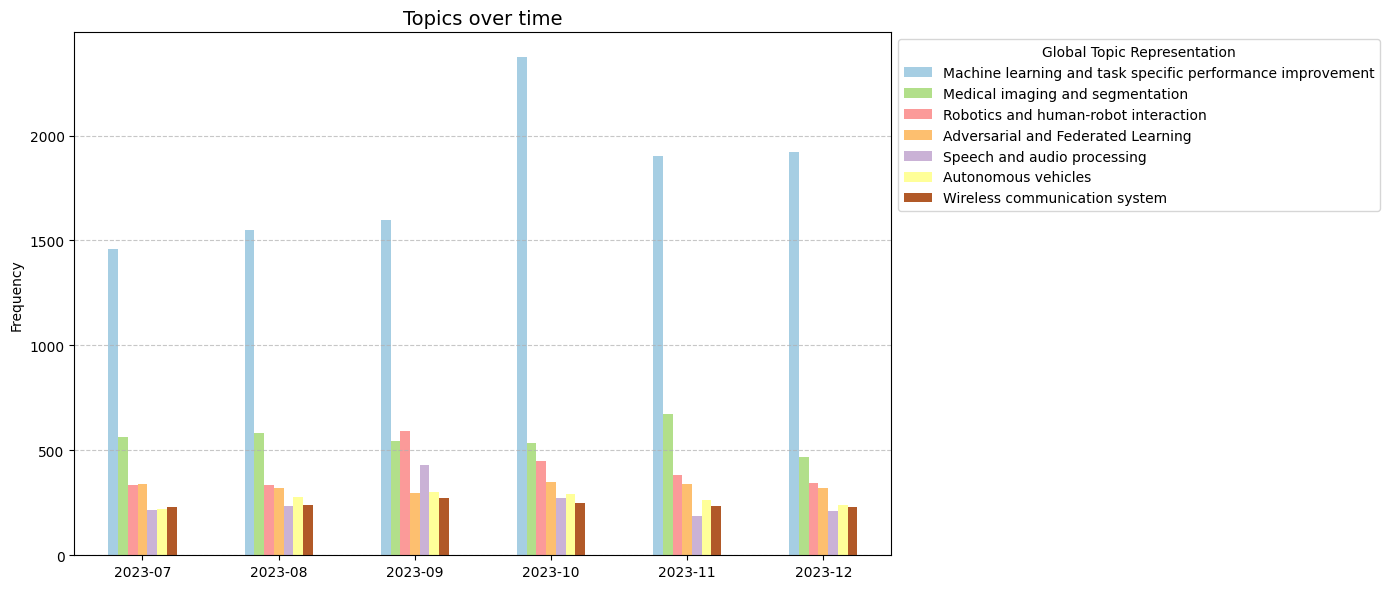

In [29]:
specific_topics = [0,1,2,3,4,5,6]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

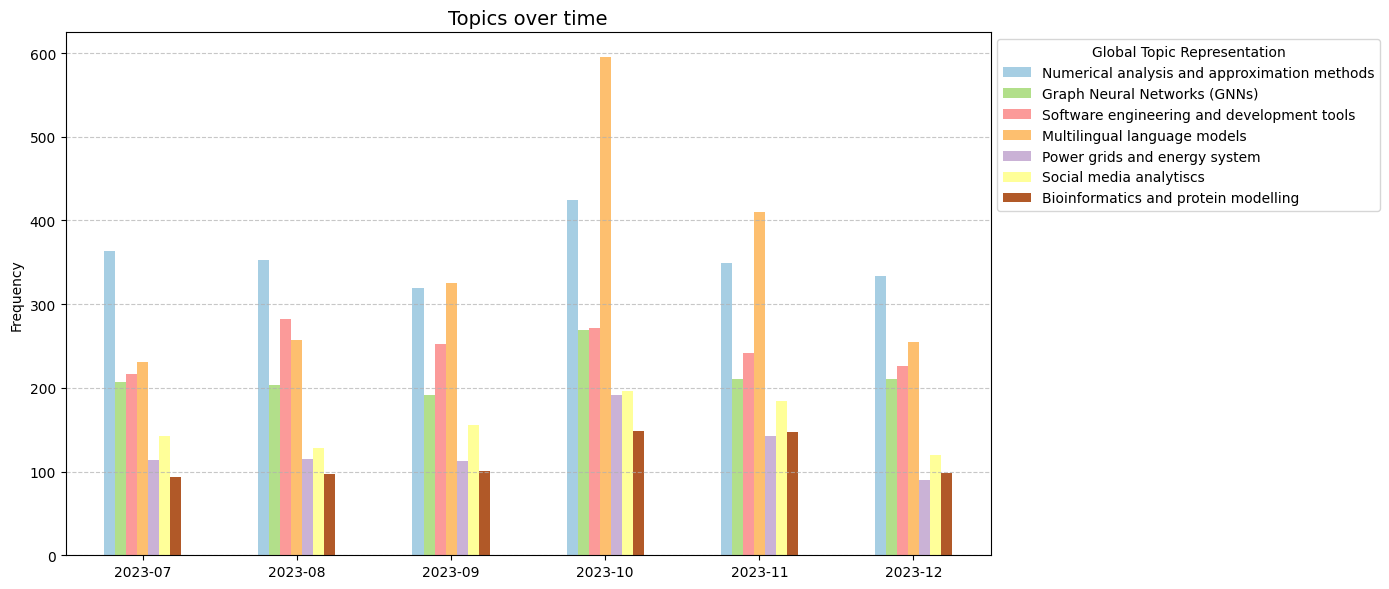

In [28]:
specific_topics = [7,8,9,10,11,12,13]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

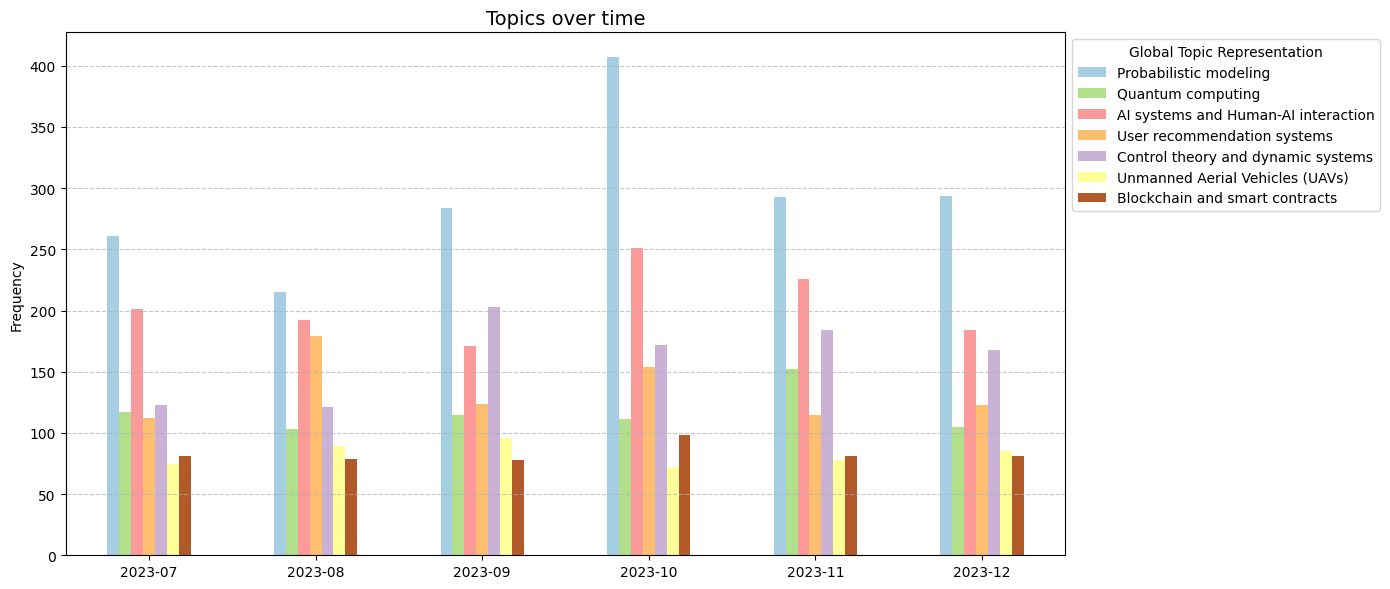

In [27]:
specific_topics = [14,15,16,17,18,19,20]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

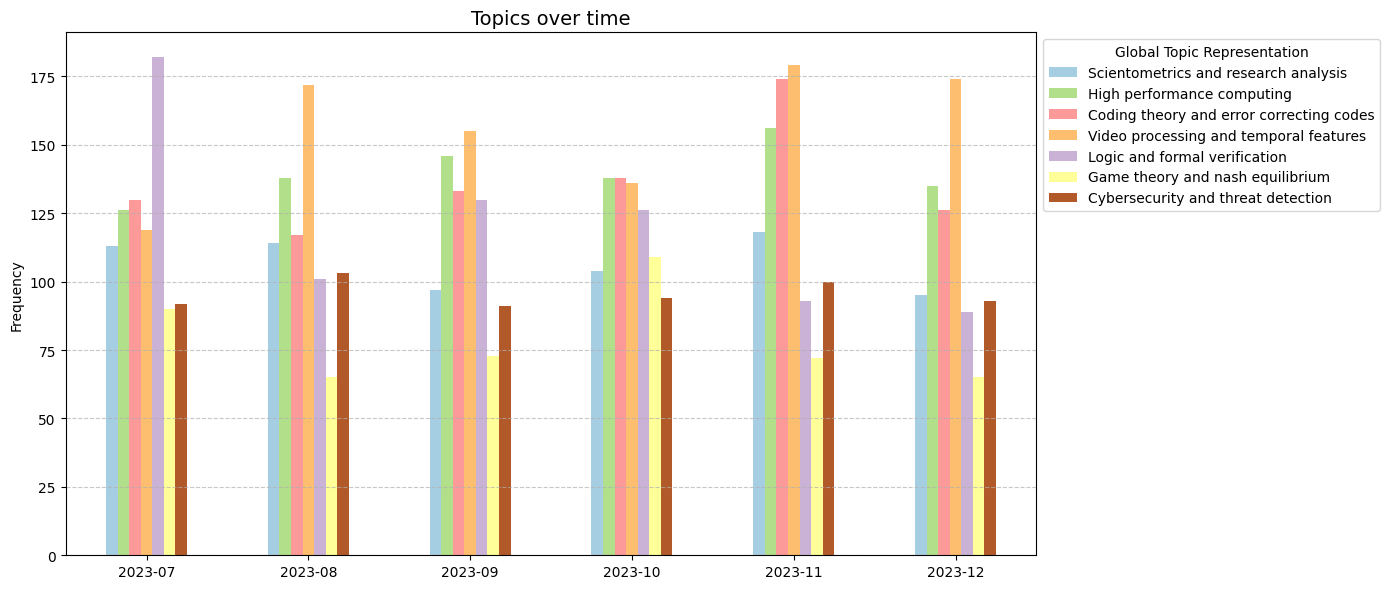

In [26]:
specific_topics = [21,22,23,24,25,26,27]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

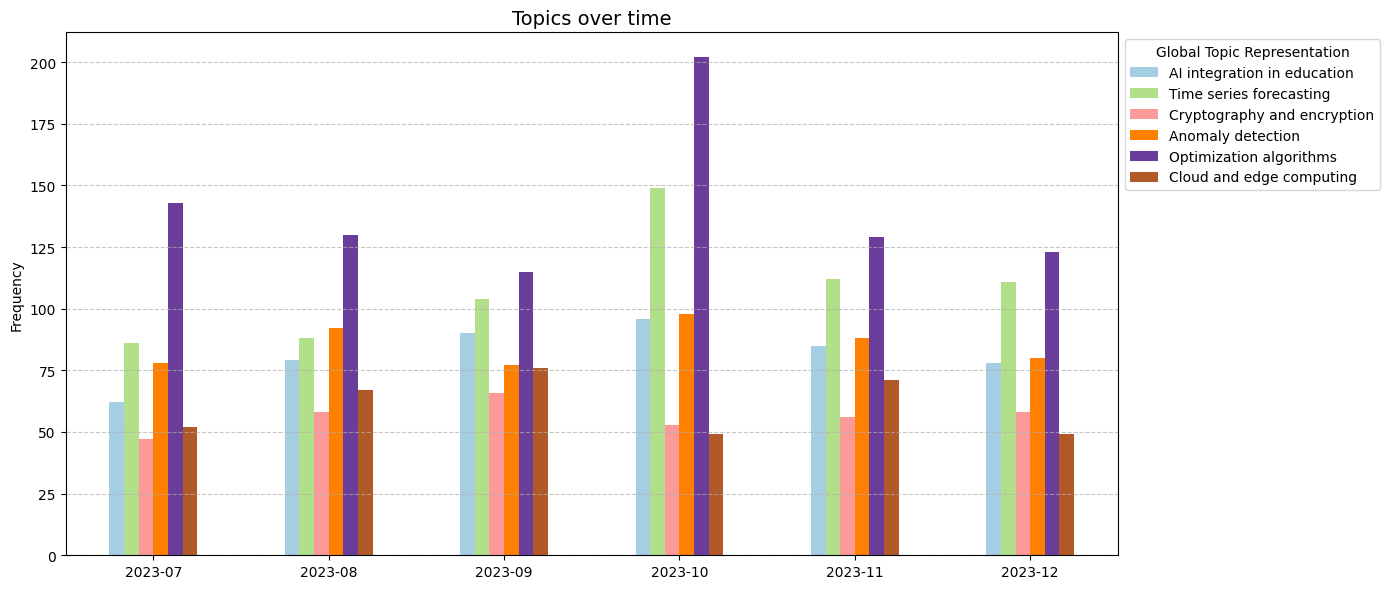

In [25]:
specific_topics = [28,29,30,31,32,33]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

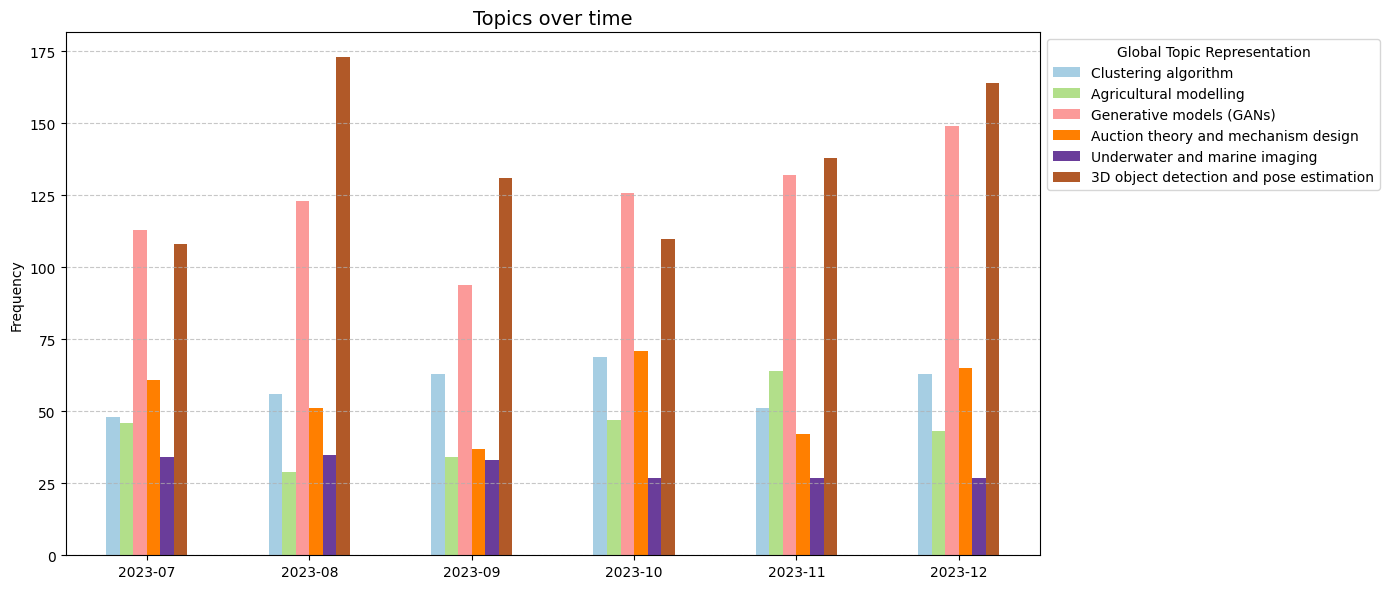

In [24]:
specific_topics = [34,35,36,37,38,39]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

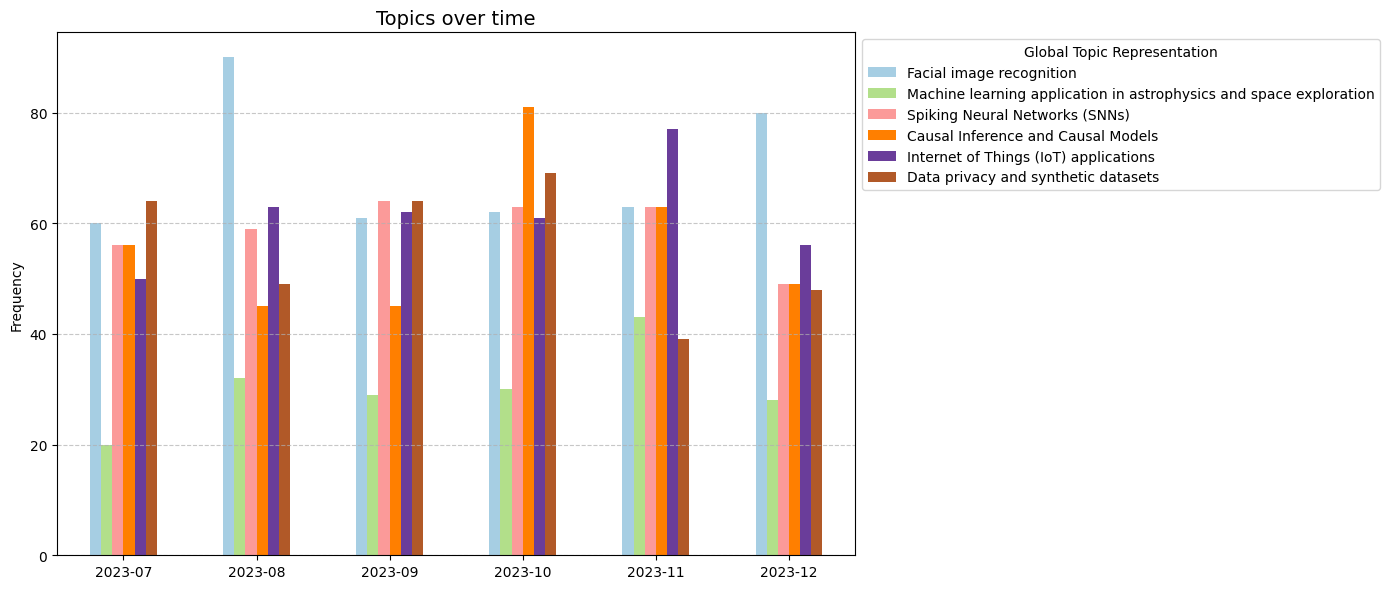

In [23]:
specific_topics = [40,41,42,43,44,45]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()